In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import FormatStrFormatter

sns.set_context('notebook')
sns.set_style('white')

# 2.1 Plotting the Data

In [19]:
# Import data
data = pd.read_csv('./data/ex1data1.txt', delimiter = ',', header=None)
X = data.iloc[:,0]
y = data.iloc[:,1]
m = len(y)

In [10]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [11]:
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


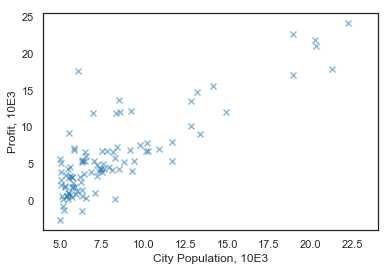

In [12]:
plt.scatter(X,y, alpha=0.5, marker='x')
plt.xlim(4,24)
plt.xlabel('City Population, 10E3')
plt.ylabel('Profit, 10E3')
plt.show()

# 2.2 Gradient Descent

In [20]:
# convert X and y's shape to rank 2, (m,1)
X = X[:, np.newaxis]
y = y[:, np.newaxis]
#add the intercept term, B0, to the numpy array
X = np.hstack((np.ones((m,1)), X))

**Cost Function**

\begin{align}
J(\theta) = \frac{1}{2m} * \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2\\
\end{align}

In [21]:
def computeCost(X, y, theta=[[0], [0]]):
    m = y.size
    return np.sum(np.power(np.dot(X, theta) - y, 2)) / (2*m)

computeCost(X, y)

32.072733877455676

**Gradient Descent**

\begin{align}
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)
\end{align}

In [9]:
def gradientDescent(X, y, theta=[[0], [0]], alpha=0.01, num_iters=1500):
    m = y.size
    cost_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, 2))
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta -= alpha * 1/(m) * (X.T.dot(h-y))
        cost_history[iter] = computeCost(X, y, theta)
        theta_history[iter] = theta.T
    
    return (theta, cost_history, theta_history)

In [10]:
#Should return [-3.6303, 1.1664]
theta, cost_history, theta_history = gradientDescent(X,y)
print('bGD Theta:', theta.ravel())

bGD Theta: [-3.63029144  1.16636235]


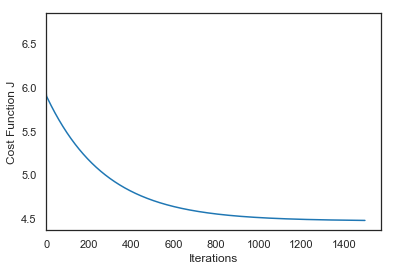

In [11]:
# Plot our batch-GD's cost history
plt.plot(cost_history)
plt.xlim(0,)
plt.xlabel('Iterations')
plt.ylabel('Cost Function J')
plt.show()

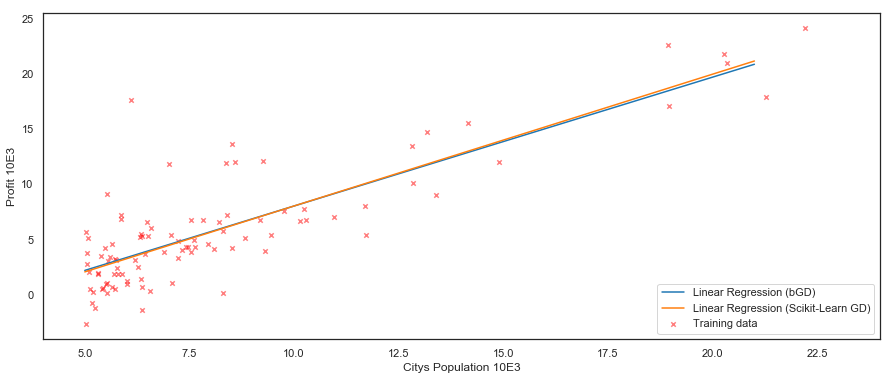

In [12]:
# The course aims at implementing as much as possible by hand
# however, there are plenty of resources which have said code implemented
# and most likely, far more optimized. So we benchmark against them when possible.
xx = np.arange(round(min(X[:,-1])), round(max(X[:,-1])))
yy = theta[0] + theta[1]*xx

# Configure the plot
plt.figure(figsize=(15,6))
plt.xlim(4, 24)
plt.xlabel('Citys Population 10E3')
plt.ylabel('Profit 10E3')

# Plot the data
plt.scatter(X[:,-1], y, s=20, alpha=0.5, c='r', marker='x', label='Training data')

# Plot our bGD implementation
plt.plot(xx, yy, label='Linear Regression (bGD)')

# Compare with Scikit-Learn's GD
regr = LinearRegression()
regr.fit(X[:,-1].reshape(-1,1), y.ravel())
plt.plot(xx, (regr.intercept_ + regr.coef_[0] * xx), label='Linear Regression (Scikit-Learn GD)')

plt.legend(loc=4)
plt.show()

In [13]:
# Predict the profit for X=[35000, 70000]
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


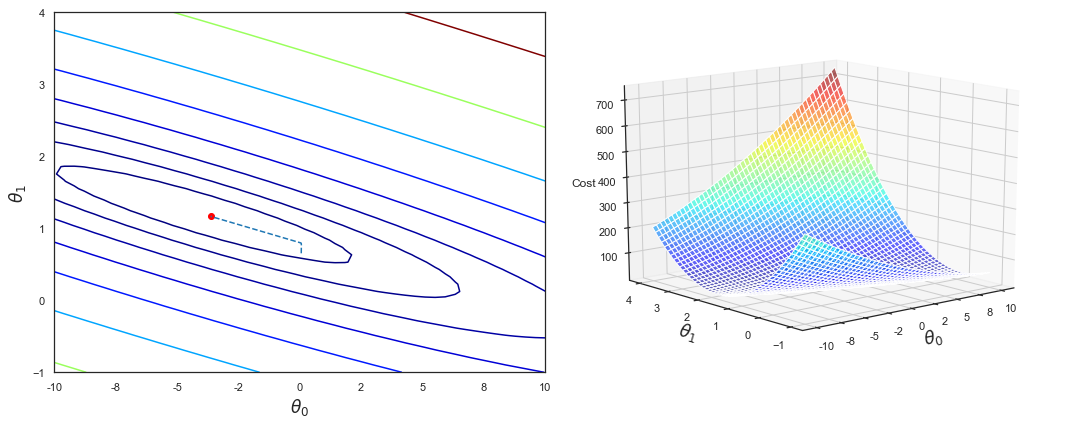

In [22]:
# Plot the J-function contour and surface

B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Compute the cost-values which correspond to the (B0,B1) theta-values
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X, y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Contour plot
CP = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')
# Add the GD path on CP
ax1.plot(theta_history[:,0], theta_history[:,1], linestyle='--')

# Area plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.tight_layout()